In [1]:
# Load libraries with aliases
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Read data from multiple files into dataframes
shootings = pd.read_csv('Resources/school-shootings-data.csv')
gender = pd.read_csv('Resources/gender-data.csv')
ethnicity = pd.read_csv('Resources/ethnicity-data.csv')
locale = pd.read_csv('Resources/locale-data.csv')
system = pd.read_csv('Resources/school-system-data.csv')

In [3]:
# Combine data into a single dataframe for processing
shootings = pd.merge(shootings, gender, on='gender_shooter1')
shootings = pd.merge(shootings, ethnicity, on='race_ethnicity_shooter1')
shootings = pd.merge(shootings, locale, on='ulocale')
shootings = pd.merge(shootings, system, on='school_type')
#shootings[['race_ethnicity_shooter1','Ethnicity', 'gender_shooter1', 'Gender', 'ulocale', 'Locale','school_type','System']]

In [4]:
# Drop unwanted columns within the dataframe
data = shootings.drop(columns=['nces_school_id','nces_district_id','deceased_notes1','school_year','school_type','enrollment','shooting_type','gender_shooter1','race_ethnicity_shooter1','shooter_relationship1','age_shooter2','gender_shooter2','race_ethnicity_shooter2','shooter_relationship2','shooter_deceased2','deceased_notes2','shooter_deceased1','white','black','hispanic','asian','american_indian_alaska_native','hawaiian_native_pacific_islander','two_or_more','resource_officer','weapon','weapon_source','staffing','low_grade','high_grade','lunch','state_fips','county_fips','ulocale'])
#data.head()

In [5]:
# Rename column labels within the dataframe for easy reference
data = data.rename(columns={'uid':'ID','school_name':'School','district_name':'District','date':'Date','year':'Year','time':'Time','day_of_week':'Day','city':'City','state':'State','killed':'Killed','injured':'Injured','casualties':'Casualties','age_shooter1':'Age','gender_shooter1':'Gender','race_ethnicity_shooter1':'Ethnicity','lat':'Latitude','long':'Longitude','county':'County'})
#data.head()

In [6]:
# Set index to uniquely identify rows within the dataframe
data = data.set_index('ID')

In [7]:
# Add columns into the dataframe
data['Month'] = pd.DatetimeIndex(data['Date']).month_name()
data['Hour'] = pd.DatetimeIndex(data['Time']).hour
data['Minute'] = pd.DatetimeIndex(data['Time']).minute
#data.head()

In [8]:
# Store number of incidents grouped by gender
byGender = data.groupby(['Gender'])['Gender'].count().reset_index(name='Incidents')
byGender.sort_values('Incidents', ascending=False).head()


,Gender,Incidents
1,Male,209
2,Unidentified,16
0,Female,10


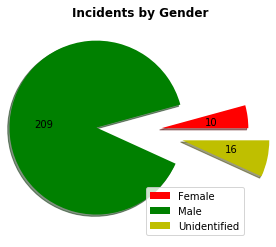

In [9]:
# Generate chart for number of incidents grouped by gender
explodes=[.25,.50,.50]
colors=['r','g','y']
plt.pie(byGender['Incidents'], labels=byGender['Incidents'], shadow=True, labeldistance=0.50, explode=explodes, colors=colors)
plt.title('Incidents by Gender', fontweight='bold')
plt.legend(byGender['Gender'], loc=4)
plt.show()

In [10]:
# Store number of incidents grouped by age
byAge = data.groupby(['Age'])['Age'].count().reset_index(name='Incidents')
byAge.sort_values('Incidents', ascending=False).head()


,Age,Incidents
7,15.0,32
8,16.0,28
6,14.0,27
9,17.0,27
10,18.0,12


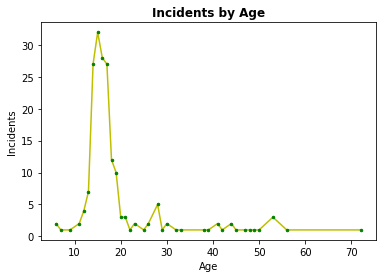

In [11]:
# Generate chart for number of incidents grouped by age
plt.plot(byAge['Age'], byAge['Incidents'], 'y', marker='.', ms=5, mfc='g', mec='g')
plt.title('Incidents by Age', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Incidents')
plt.show()

In [12]:
# Store number of incidents grouped by month
byMonth = data.groupby(['Month'])['Month'].count().reset_index(name='Incidents')
byMonth.sort_values('Incidents', ascending=False).head()

,Month,Incidents
4,January,38
3,February,37
10,October,30
11,September,27
0,April,22


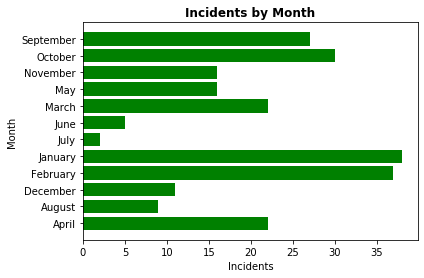

In [13]:
# Generate chart for number of incidents grouped by month
plt.barh(byMonth['Month'], byMonth['Incidents'], color='g')
plt.title('Incidents by Month', fontweight='bold')
plt.xlabel('Incidents')
plt.ylabel('Month')
plt.show()

In [19]:
# Store number of incidents grouped by day
byDay = data.groupby(['Day'])['Day'].count().reset_index(name='Incidents')
byDay.sort_values('Incidents', ascending=False).head()

,Day,Incidents
3,Tuesday,55
4,Wednesday,53
1,Monday,47
0,Friday,45
2,Thursday,35


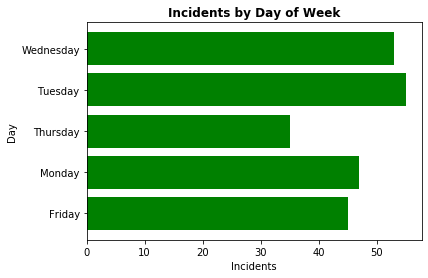

In [20]:
# Generate chart for number of incidents grouped by day
plt.barh(byDay['Day'], byDay['Incidents'], color='g')
plt.title('Incidents by Day of Week', fontweight='bold')
plt.xlabel('Incidents')
plt.ylabel('Day')
plt.show()

In [23]:
# Store number of incidents grouped by hour
byHour = data.groupby(['Hour'])['Hour'].count().reset_index(name='Incidents')
byHour.sort_values('Incidents', ascending=False).head()

,Hour,Incidents
5,12.0,33
1,8.0,30
0,7.0,29
7,14.0,27
3,10.0,26


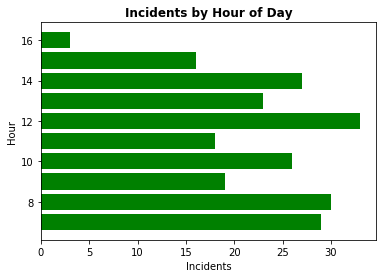

In [24]:
# Generate chart for number of incidents grouped by month
plt.barh(byHour['Hour'], byHour['Incidents'], color='g')
plt.title('Incidents by Hour of Day', fontweight='bold')
plt.xlabel('Incidents')
plt.ylabel('Hour')
plt.show()

In [26]:
# Store number of incidents grouped by hour
byYear = data.groupby(['Year'])['Year'].count().reset_index(name='Incidents')
byYear.sort_values('Incidents', ascending=False).head()

,Year,Incidents
19,2018,24
15,2014,16
7,2006,14
18,2017,14
17,2016,13


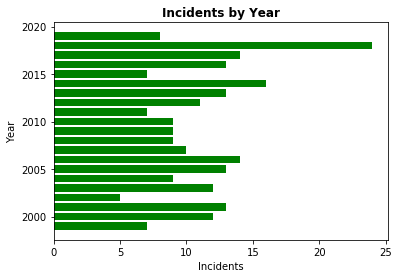

In [28]:
# Generate chart for number of incidents grouped by month
plt.barh(byYear['Year'], byYear['Incidents'], color='g')
plt.title('Incidents by Year', fontweight='bold')
plt.xlabel('Incidents')
plt.ylabel('Year')
plt.show()